In [22]:
import datetime
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

df = pd.DataFrame()
print (df)

Empty DataFrame
Columns: []
Index: []


In [23]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

data = pd.read_csv('newdata.csv', parse_dates=['Date'])
data

,Date,Open
0,2014-01-28,1783.000000
1,2014-01-29,1790.150024
2,2014-01-30,1777.170044
3,2014-01-31,1790.880005
4,2014-02-03,1782.680054
5,2014-02-04,1743.819946
6,2014-02-05,1753.380005
7,2014-02-06,1752.989990
8,2014-02-07,1776.010010
9,2014-02-10,1796.199951


In [24]:
print (data.dtypes)

Date    datetime64[ns]
Open           float64
dtype: object


In [25]:
data['Date']=pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index(['Date'], inplace=True)

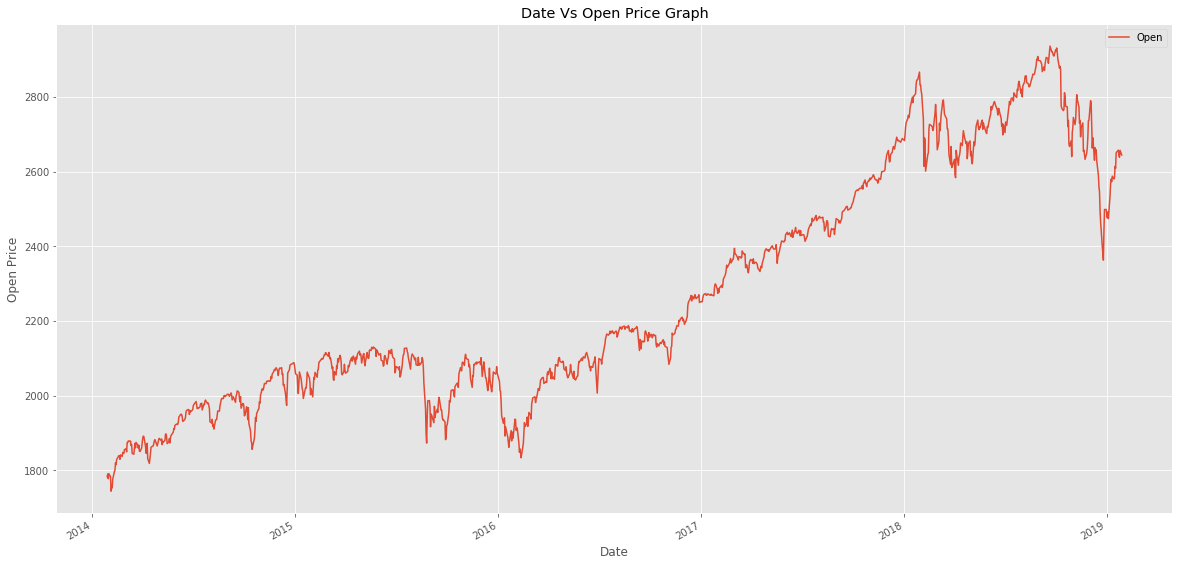

In [26]:
data.plot()
plt.title('Date Vs Open Price Graph')
plt.ylabel('Open Price')
plt.xlabel('Date')
plt.show()

In [27]:
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
train_data = data['1/28/2014':'12/10/2018']
test_data = data['12/13/2018':'1/28/2019']

In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            print('except')

In [9]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 10138.973475203631 for model SARIMAX(3, 1, 1)x(3, 1, 1, 12)


In [10]:

# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

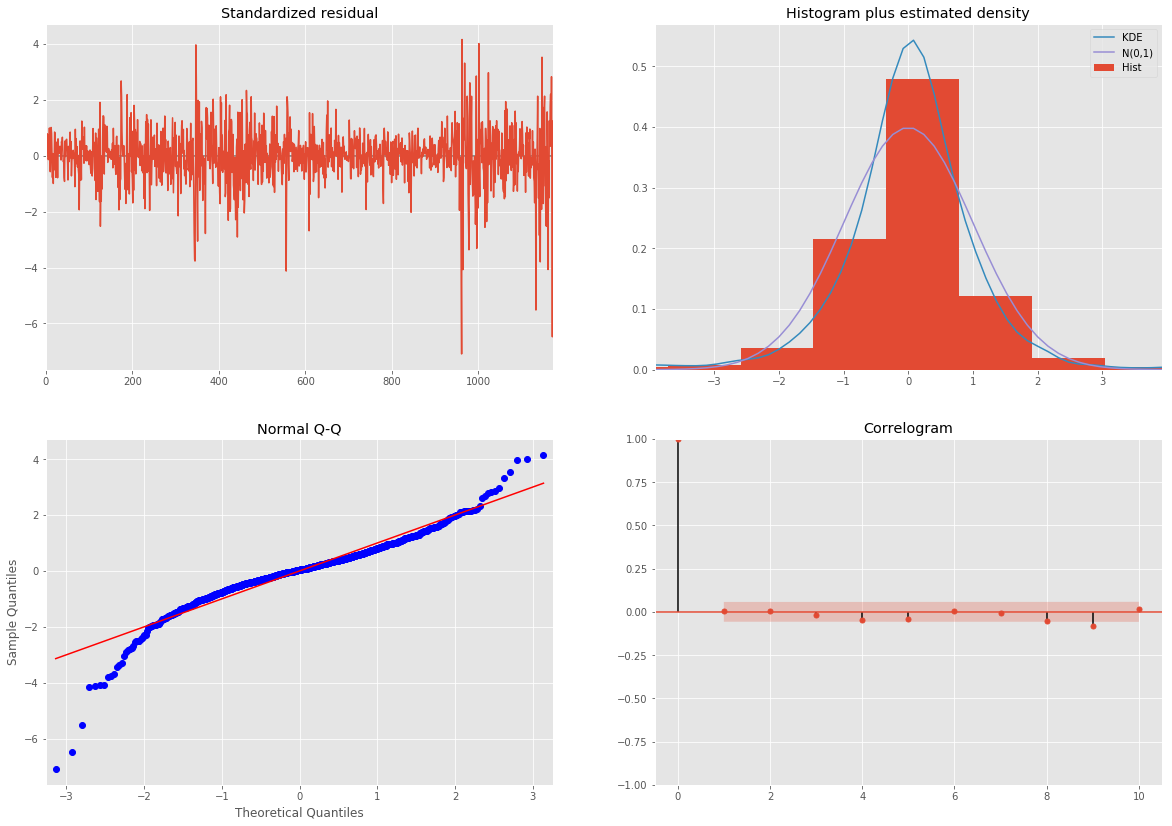

In [30]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()


In [33]:
pred0 = results.get_prediction(start='2014-03-01', dynamic=False)
pred0_ci = pred0.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [34]:
pred1 = results.get_prediction(start='2014-03-01', dynamic=True)
pred1_ci = pred1.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [31]:
pred2 = results.get_forecast('3/1/2019')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['12/13/2018':'1/28/2019'])

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

NameError: name 'pred0' is not defined

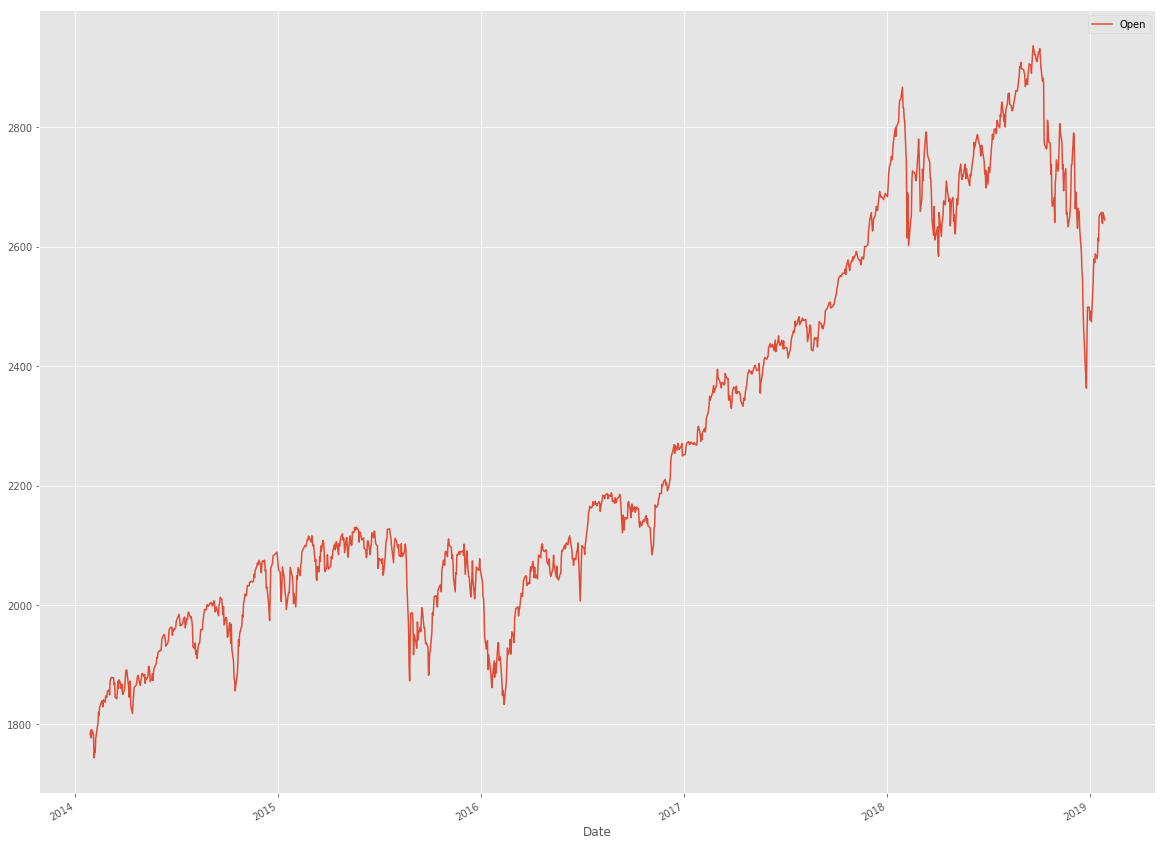

In [35]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [36]:
prediction = pred2.predicted_mean['1960-01-01':'1960-12-01'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 1960 is {:.2f}%'.format(MAPE))

NameError: name 'pred2' is not defined